## Import Module

In [395]:
import numpy as np 
import math 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns 
sns.set_palette('muted')
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import os 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import timedelta
### Own module
import Common_Includes as CI

## Load Dataset

In [57]:
def load_data(filename):
    print('Data File Name: {}'.format(filename))
    dataset = pd.read_csv(filename)
    return dataset

In [ ]:
dataframe = load_data(r'data.csv')

In [59]:
CI.summarize_dataset(dataframe, 'is_booked')

(1890, 7)
   vehicle_id        date  is_booked    tmv category_grouped  \
0      333483  2018-05-25          0  14569          midsize   
1      304273  2018-05-12          1   4201          compact   
2      298081  2018-04-07          1   5724          midsize   
3      406331  2018-12-31          1  39102              suv   
4      456223  2018-08-09          0   9666          midsize   

   demand_supply_ratio  price  
0             1.902318   30.0  
1            14.622831   39.0  
2             8.659708   24.0  
3            13.570390  121.0  
4             1.297453   42.0  
          vehicle_id    is_booked           tmv  demand_supply_ratio  \
count    1890.000000  1890.000000   1890.000000          1890.000000   
mean   351141.568783     0.537566  14136.074603             6.043046   
std     88018.990982     0.498719   9340.612268             3.951393   
min    174075.000000     0.000000   3875.000000             0.463101   
25%    298081.000000     0.000000   7115.000000      

In [60]:
CI.describe_table(dataframe)

,Variable Name,Variable Type,Unique Values,Percentage of Missing Value
0,index,int64,1890,0.00%
1,vehicle_id,int64,25,0.00%
2,date,object,394,0.00%
3,is_booked,int64,2,0.00%
4,tmv,int64,25,0.00%
5,category_grouped,object,5,0.00%
6,demand_supply_ratio,float64,1686,0.00%
7,price,float64,84,0.00%


* There are total 7 columns in the dataframe dataset, one date variable. None of them has missing value -> No need for missing value treatment
* There are 25 distinct vehicles with total 1,890 records

### Convert data type if necessary

In [61]:
def convert_data_type(data):
    df = data.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['category_grouped'] = df['category_grouped'].astype('category')
    df['price'] = df['price'].astype(int)
    return df

In [62]:
dataframe1 = convert_data_type(dataframe)

In [63]:
CI.describe_table(dataframe1)

,Variable Name,Variable Type,Unique Values,Percentage of Missing Value
0,index,int64,1890,0.00%
1,vehicle_id,int64,25,0.00%
2,date,datetime64[ns],394,0.00%
3,is_booked,int64,2,0.00%
4,tmv,int64,25,0.00%
5,category_grouped,category,5,0.00%
6,demand_supply_ratio,float64,1686,0.00%
7,price,int64,84,0.00%


In [65]:
dataframe1.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price
0,333483,2018-05-25,0,14569,midsize,1.902318,30
1,304273,2018-05-12,1,4201,compact,14.622831,39
2,298081,2018-04-07,1,5724,midsize,8.659708,24
3,406331,2018-12-31,1,39102,suv,13.570390,121
4,456223,2018-08-09,0,9666,midsize,1.297453,42


## Process date variable and derivate variables

In [66]:
# assume all date were happened in US, based on US holiday calendar
def transform_date(data, col):
    df = data.copy()
    df['year_month'] = df[col].dt.strftime('%Y-%m')
    df['day_of_month'] = df[col].dt.day
    df['day_of_week'] = df[col].dt.weekday + 1
    df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x > 5 else 0).astype(int)
    cal = calendar()
    holidays = cal.holidays(start = df[col].min(), end = df[col].max())
    df['holiday'] = df[col].isin(holidays)
    df['holiday'] = df['holiday'].apply(lambda x: 1 if x == True else 0)
    return df

In [67]:
dataframe2 = transform_date(dataframe1, 'date')

In [68]:
dataframe2.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0


In [69]:
dataframe2.holiday.value_counts()

0    1825
1      65
Name: holiday, dtype: int64

In [70]:
dataframe2.holiday.value_counts(normalize = True)

0    0.965608
1    0.034392
Name: holiday, dtype: float64

In [71]:
dataframe2.category_grouped.value_counts()

suv        687
midsize    634
compact    421
upscale     80
van         68
Name: category_grouped, dtype: int64

In [72]:
dataframe2['category_grouped_num'] = dataframe2['category_grouped'].cat.codes

In [75]:
dataframe2.groupby(['category_grouped', 'category_grouped_num']).size()

category_grouped  category_grouped_num
compact           0                       421
midsize           1                       634
suv               2                       687
upscale           3                        80
van               4                        68
dtype: int64

In [76]:
dataframe2.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1


## Data Analysis and Exploration

In [77]:
dataframe2.dtypes

vehicle_id                       int64
date                    datetime64[ns]
is_booked                        int64
tmv                              int64
category_grouped              category
demand_supply_ratio            float64
price                            int64
year_month                      object
day_of_month                     int64
day_of_week                      int64
weekend                          int64
holiday                          int64
category_grouped_num              int8
dtype: object

In [78]:
dataframe2.columns

Index(['vehicle_id', 'date', 'is_booked', 'tmv', 'category_grouped',
       'demand_supply_ratio', 'price', 'year_month', 'day_of_month',
       'day_of_week', 'weekend', 'holiday', 'category_grouped_num'],
      dtype='object')

### For continuous variables

In [79]:
con_var = ['tmv', 'demand_supply_ratio', 'price',]

In [80]:
dataframe2[con_var].describe()

,tmv,demand_supply_ratio,price
count,1890.000000,1890.000000,1890.000000
mean,14136.074603,6.043046,45.396825
std,9340.612268,3.951393,22.193485
min,3875.000000,0.463101,10.000000
25%,7115.000000,3.002744,30.000000
50%,10850.000000,5.694339,39.000000
75%,18802.000000,8.431289,52.000000
max,39102.000000,23.333333,134.000000


### Check relationship between variables with is_booked

In [236]:
def barchart(data, feat, target, n = 10):
    df = data.copy()
    if df[feat].nunique() < 10:
        vis = df.groupby([feat])[target].agg(['count', 'sum']).reset_index().rename(columns = {'count': 'Number of Observations', 'sum':'Number of Booked'})
        vis['Percentage of Obsverations'] = round((vis['Number of Observations'] / vis['Number of Observations'].sum()) * 100, 2)
        vis['Booked Rate(%)'] = round((vis['Number of Booked'] / vis['Number of Observations']) * 100, 2)  
        vis.rename(columns = {feat: 'decile'}, inplace = True)
    else:
        rank, bins = pd.qcut(df[feat], q = n, retbins = True, duplicates = 'drop')
        decile, ind = pd.factorize(rank, sort = True)
        df['decile'] = decile
        ind2 = pd.DataFrame({'decile': np.arange(0, len(ind)), feat + '_range':ind}) 
        df = df.merge(ind2, on = 'decile')
        df['decile'] = df['decile'] + 1 
        vis = df.groupby(['decile', feat + '_range'])[target].agg(['count', 'sum']).reset_index().rename(columns = {'count': 'Number of Observations', 'sum':'Number of Booked'})                                                                         
        vis['Percentage of Obsverations'] = round((vis['Number of Observations'] / vis['Number of Observations'].sum()) * 100, 2)
        vis['Booked Rate(%)'] = round((vis['Number of Booked'] / vis['Number of Observations']) * 100, 2)    
    print('Relation Between ' + feat + ' with ' + target + ' Summary Table')
    print(vis)
    print("\n========================================================")
    print('Relation Between ' + feat + ' with ' + target + ' Summary Chart')
    ax = sns.barplot(x='decile', y='Number of Observations', data=vis, color="Pink")
    vis['Booked Rate(%)'].plot(kind='line', color = 'k', secondary_y=True)
    plt.ylabel('Booked Rate(%)')
    plt.yticks(np.arange(1, 10) * 10)
    sns.despine(left=True)

Relation Between tmv with is_booked Summary Table
   decile           tmv_range  Number of Observations  Number of Booked  \
0       1  (3874.999, 5669.0]                     204               126   
1       2    (5669.0, 6353.0]                     231               172   
2       3    (6353.0, 7484.0]                     198               107   
3       4    (7484.0, 8941.0]                     214               114   
4       5   (8941.0, 10850.0]                     111                20   
5       6  (10850.0, 14569.0]                     250                40   
6       7  (14569.0, 18150.0]                     183               106   
7       8  (18150.0, 19525.0]                     196               167   
8       9  (19525.0, 26808.0]                     120                82   
9      10  (26808.0, 39102.0]                     183                82   

   Percentage of Obsverations  Booked Rate(%)  
0                       10.79           61.76  
1                       12.2

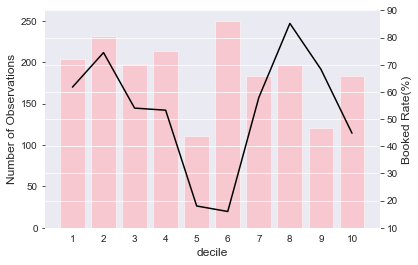

In [237]:
barchart(dataframe2, 'tmv', 'is_booked', n = 10)

##### Insight from above anlaysis about tmv (true market value of vehicle)

* Lower and higher true market value of vehicle have higher booked rate
* Middle or just average true market value of vehicle have really lower booked rate

Relation Between category_grouped with is_booked Summary Table
    decile  Number of Observations  Number of Booked  \
0  compact                     421               281   
1  midsize                     634               303   
2      suv                     687               366   
3  upscale                      80                36   
4      van                      68                30   

   Percentage of Obsverations  Booked Rate(%)  
0                       22.28           66.75  
1                       33.54           47.79  
2                       36.35           53.28  
3                        4.23           45.00  
4                        3.60           44.12  

Relation Between category_grouped with is_booked Summary Chart


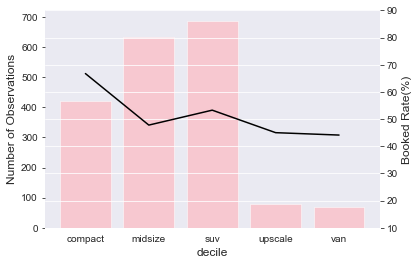

In [238]:
barchart(dataframe2, 'category_grouped', 'is_booked', n = 10)

##### Insight from above anlaysis about vehicle category group

* Compact car has higher booked rate
* Other types of car have lower booked rate

Relation Between demand_supply_ratio with is_booked Summary Table
   decile demand_supply_ratio_range  Number of Observations  Number of Booked  \
0       1            (0.462, 0.985]                     191                51   
1       2            (0.985, 1.515]                     187                62   
2       3            (1.515, 4.013]                     189                79   
3       4            (4.013, 5.024]                     189                83   
4       5            (5.024, 5.694]                     189                86   
5       6            (5.694, 6.688]                     189               101   
6       7            (6.688, 7.876]                     189               110   
7       8            (7.876, 9.042]                     189               135   
8       9           (9.042, 11.144]                     189               141   
9      10          (11.144, 23.333]                     189               168   

   Percentage of Obsverations  Booked Rate

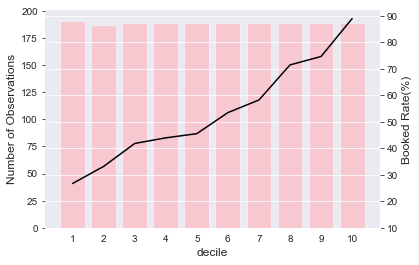

In [239]:
barchart(dataframe2, 'demand_supply_ratio', 'is_booked', n = 10)

##### Insight from above anlaysis about daily demand (web and app sessions) over supply (count of live listings in the local market, e.g. a city)

* demand supply ratio has linear relationship with booked rate
* Higher demand supply ratio has higher booked rate

Relation Between price with is_booked Summary Table
   decile    price_range  Number of Observations  Number of Booked  \
0       1  (9.999, 26.0]                     255               188   
1       2   (26.0, 29.0]                     158               109   
2       3   (29.0, 32.0]                     208               145   
3       4   (32.0, 36.0]                     148                96   
4       5   (36.0, 39.0]                     206                97   
5       6   (39.0, 40.0]                     212               107   
6       7   (40.0, 47.0]                     138                34   
7       8   (47.0, 59.0]                     200                26   
8       9   (59.0, 82.0]                     181               126   
9      10  (82.0, 134.0]                     184                88   

   Percentage of Obsverations  Booked Rate(%)  
0                       13.49           73.73  
1                        8.36           68.99  
2                       11.01    

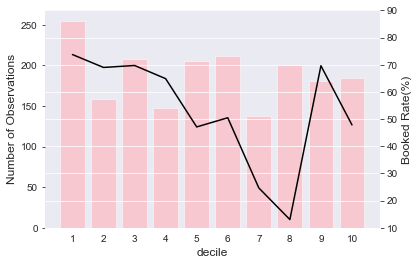

In [240]:
barchart(dataframe2, 'price', 'is_booked', n = 10)

##### Insight from above anlaysis about price

* With price incresae, the booked rate decrease until when the price is $59
* Booked rate is going higher when price increase from 60

Relation Between day_of_month with is_booked Summary Table
   decile day_of_month_range  Number of Observations  Number of Booked  \
0       1       (0.999, 4.0]                     226               130   
1       2         (4.0, 7.0]                     203               105   
2       3        (7.0, 10.0]                     183                80   
3       4       (10.0, 13.0]                     186                84   
4       5       (13.0, 16.0]                     186                92   
5       6       (16.0, 19.0]                     196               109   
6       7       (19.0, 22.0]                     192               105   
7       8       (22.0, 25.0]                     186               114   
8       9       (25.0, 28.0]                     185               105   
9      10       (28.0, 31.0]                     147                92   

   Percentage of Obsverations  Booked Rate(%)  
0                       11.96           57.52  
1                       10.74 

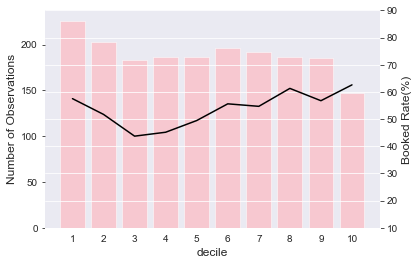

In [241]:
barchart(dataframe2, 'day_of_month', 'is_booked', n = 10)

##### Insight from above anlaysis about day of month

* The relationship between day of month and is_booked is kind of flat
* The begining of month (1st week) and end of month (3rd and 4th week) have slightly higher booked rate
* The 2nd week of month has slightly lower booked rate

Relation Between day_of_week with is_booked Summary Table
   decile  Number of Observations  Number of Booked  \
0       1                     270               143   
1       2                     269               143   
2       3                     284               136   
3       4                     270               144   
4       5                     268               143   
5       6                     274               160   
6       7                     255               147   

   Percentage of Obsverations  Booked Rate(%)  
0                       14.29           52.96  
1                       14.23           53.16  
2                       15.03           47.89  
3                       14.29           53.33  
4                       14.18           53.36  
5                       14.50           58.39  
6                       13.49           57.65  

Relation Between day_of_week with is_booked Summary Chart


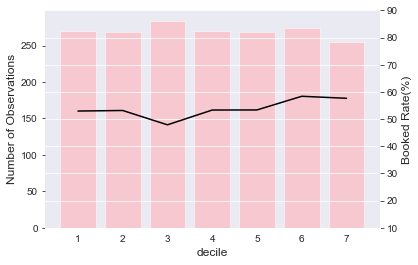

In [242]:
barchart(dataframe2, 'day_of_week', 'is_booked', n = 10)

##### Insight from above anlaysis about day of week

* The relationship between day of week and is_booked is really flat
* Only wednesday has sightly lower booked rate

Relation Between weekend with is_booked Summary Table
   decile  Number of Observations  Number of Booked  \
0       0                    1361               709   
1       1                     529               307   

   Percentage of Obsverations  Booked Rate(%)  
0                       72.01           52.09  
1                       27.99           58.03  

Relation Between weekend with is_booked Summary Chart


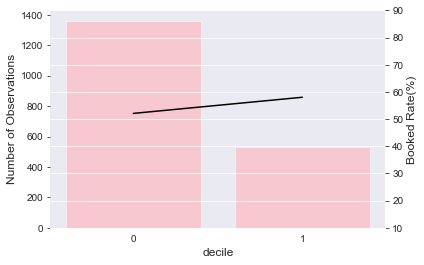

In [243]:
barchart(dataframe2, 'weekend', 'is_booked', n = 10)

##### Insight from above anlaysis about weekend

* Weekend has slightly higher booked rate than weekday

Relation Between holiday with is_booked Summary Table
   decile  Number of Observations  Number of Booked  \
0       0                    1825               974   
1       1                      65                42   

   Percentage of Obsverations  Booked Rate(%)  
0                       96.56           53.37  
1                        3.44           64.62  

Relation Between holiday with is_booked Summary Chart


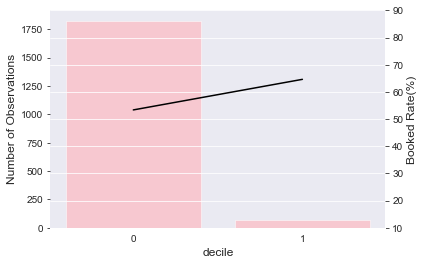

In [244]:
barchart(dataframe2, 'holiday', 'is_booked', n = 10)

##### Insight from above anlaysis about holiday

* Holiday has a slightly higher booked rate than non-holiday

In [249]:
def barchart_yearmonth(data, feat, target):
    df = data.copy()
    vis = df.groupby([feat])[target].agg(['count', 'sum']).reset_index().rename(columns = {'count': 'Number of Observations', 'sum':'Number of Booked'})
    vis['Percentage of Obsverations'] = round((vis['Number of Observations'] / vis['Number of Observations'].sum()) * 100, 2)
    vis['Booked Rate(%)'] = round((vis['Number of Booked'] / vis['Number of Observations']) * 100, 2)  
    vis.rename(columns = {feat: 'decile'}, inplace = True)
    print('Relation Between ' + feat + ' with ' + target + ' Summary Table')
    print(vis)
    print("\n========================================================")
    print('Relation Between ' + feat + ' with ' + target + ' Summary Chart')
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x='decile', y='Number of Observations', data=vis, color="Pink")
    vis['Booked Rate(%)'].plot(kind='line', color = 'k', secondary_y=True)
    plt.ylabel('Booked Rate(%)')
    plt.yticks(np.arange(1, 10) * 10)
    sns.despine(left=True)

Relation Between year_month with is_booked Summary Table
     decile  Number of Observations  Number of Booked  \
0   2018-02                      76                35   
1   2018-03                      82                46   
2   2018-04                     103                43   
3   2018-05                     128                73   
4   2018-06                     138                96   
5   2018-07                     137               113   
6   2018-08                     171               113   
7   2018-09                     180                71   
8   2018-10                     202                84   
9   2018-11                     176                70   
10  2018-12                     166                88   
11  2019-01                     167                91   
12  2019-02                     143                81   
13  2019-03                      21                12   

    Percentage of Obsverations  Booked Rate(%)  
0                         4.02        

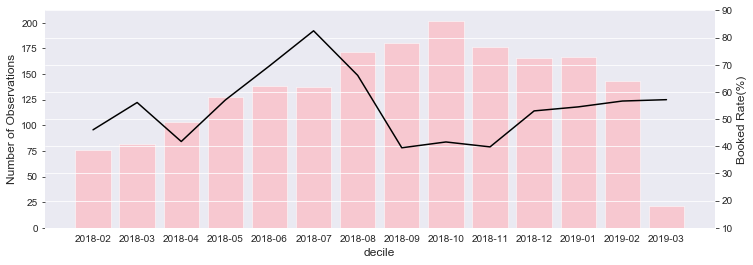

In [250]:
barchart_yearmonth(dataframe2, 'year_month', 'is_booked')

##### Insight from above anlaysis about year_month with booked 

* Sep, Oct, and Nov, have larger volumn of activities, but lowest booked rate
* Jun, Jul, Aug have highest booked rate 
* Dec, Jan, Feb have higher booked rate
* There are seasonality for booking and volumn of acitivities

### Check relationship between variables with price

In [286]:
def barchart_price(data, feat, target, n = 10):
    df = data.copy()
    if df[feat].nunique() < 10:
        vis = df.groupby([feat])[target].agg(['count', 'mean', 'median']).reset_index().rename(columns = {'count': 'Number of Observations', 'mean':'Average of Price($)', 'median': 'Median of Price($)'})
        vis['Percentage of Obsverations'] = round((vis['Number of Observations'] / vis['Number of Observations'].sum()) * 100, 2)
        vis['Average of Price($)'] = round(vis['Average of Price($)'], 2)
        vis['Median of Price($)'] = round(vis['Median of Price($)'], 2)  
        vis.rename(columns = {feat: 'decile'}, inplace = True)
    else:
        rank, bins = pd.qcut(df[feat], q = n, retbins = True, duplicates = 'drop')
        decile, ind = pd.factorize(rank, sort = True)
        df['decile'] = decile
        ind2 = pd.DataFrame({'decile': np.arange(0, len(ind)), feat + '_range':ind}) 
        df = df.merge(ind2, on = 'decile')
        df['decile'] = df['decile'] + 1 
        vis = df.groupby(['decile', feat + '_range'])[target].agg(['count', 'mean', 'median']).reset_index().rename(columns = {'count': 'Number of Observations', 'mean':'Average of Price($)', 'median': 'Median of Price($)'})                                                                        
        vis['Percentage of Obsverations'] = round((vis['Number of Observations'] / vis['Number of Observations'].sum()) * 100, 2)
        vis['Average of Price($)'] = round(vis['Average of Price($)'], 2)
        vis['Median of Price($)'] = round(vis['Median of Price($)'], 2)     
    print('Relation Between ' + feat + ' with ' + target + ' Summary Table')
    print(vis)
    print("\n========================================================")
    print('Relation Between ' + feat + ' with ' + target + ' Summary Chart')
    ax = sns.barplot(x='decile', y='Number of Observations', data=vis, color="Pink")
    vis['Average of Price($)'].plot(kind='line', color = 'k', secondary_y=True)
    vis['Median of Price($)'].plot(kind='line', color = 'r', secondary_y=True)
    plt.ylabel('Price($)')
    plt.ylim((20, 100))
    plt.legend(bbox_to_anchor=(1.10,1), loc="upper left")
    sns.despine(left=True)

Relation Between is_booked with price Summary Table
   decile  Number of Observations  Average of Price($)  Median of Price($)  \
0       0                     874                48.32                  40   
1       1                    1016                42.88                  35   

   Percentage of Obsverations  
0                       46.24  
1                       53.76  

Relation Between is_booked with price Summary Chart


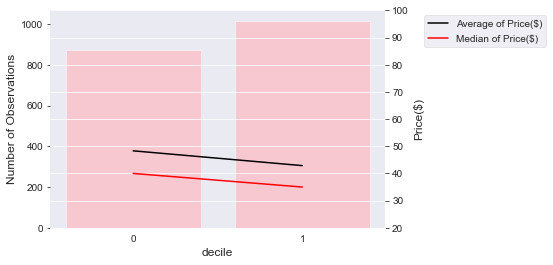

In [287]:
barchart_price(dataframe2, 'is_booked', 'price', n = 20)

##### Insight from above anlaysis about is_booked with price 

* Non-booked has higher price than booked - people tend to booked lower price when all other variable same
* This is one reason we can build Booked Probability Model to predict likelihood of this car will be booked first
* Then use the output probability as input of Pricing Regression Model, which can adjust price like: if this car lower likelihood to booked, we can adjust to lower price to attract people to book.

Relation Between tmv with price Summary Table
   decile           tmv_range  Number of Observations  Average of Price($)  \
0       1  (3874.999, 5669.0]                     204                32.82   
1       2    (5669.0, 6353.0]                     231                29.02   
2       3    (6353.0, 7484.0]                     198                38.60   
3       4    (7484.0, 8941.0]                     214                33.39   
4       5   (8941.0, 10850.0]                     111                41.06   
5       6  (10850.0, 14569.0]                     250                39.46   
6       7  (14569.0, 18150.0]                     183                45.23   
7       8  (18150.0, 19525.0]                     196                41.47   
8       9  (19525.0, 26808.0]                     120                80.56   
9      10  (26808.0, 39102.0]                     183                93.53   

   Median of Price($)  Percentage of Obsverations  
0                  34                      

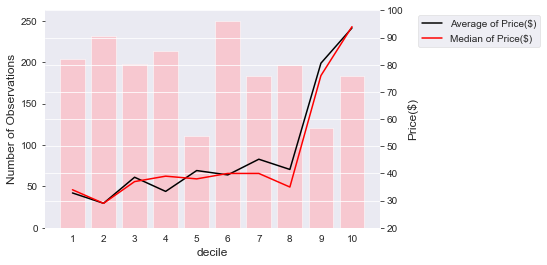

In [288]:
barchart_price(dataframe2, 'tmv', 'price', n = 10)

##### Insight from above anlaysis about true market value of vehicle with price 

* Higher true market value of vehicle can bring higher booked price - align with business sense (as expect)

Relation Between category_grouped with price Summary Table
    decile  Number of Observations  Average of Price($)  Median of Price($)  \
0  compact                     421                35.00                  38   
1  midsize                     634                36.01                  30   
2      suv                     687                57.91                  47   
3  upscale                      80                32.00                  32   
4      van                      68                86.62                  86   

   Percentage of Obsverations  
0                       22.28  
1                       33.54  
2                       36.35  
3                        4.23  
4                        3.60  

Relation Between category_grouped with price Summary Chart


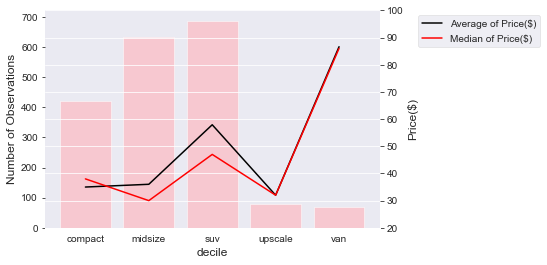

In [289]:
barchart_price(dataframe2, 'category_grouped', 'price', n = 10)

##### Insight from above anlaysis about category_grouped with price 

* suv and van have higher booked price

Relation Between demand_supply_ratio with price Summary Table
   decile demand_supply_ratio_range  Number of Observations  \
0       1            (0.462, 0.985]                     191   
1       2            (0.985, 1.515]                     187   
2       3            (1.515, 4.013]                     189   
3       4            (4.013, 5.024]                     189   
4       5            (5.024, 5.694]                     189   
5       6            (5.694, 6.688]                     189   
6       7            (6.688, 7.876]                     189   
7       8            (7.876, 9.042]                     189   
8       9           (9.042, 11.144]                     189   
9      10          (11.144, 23.333]                     189   

   Average of Price($)  Median of Price($)  Percentage of Obsverations  
0                52.31                  52                       10.11  
1                51.51                  55                        9.89  
2                45.57   

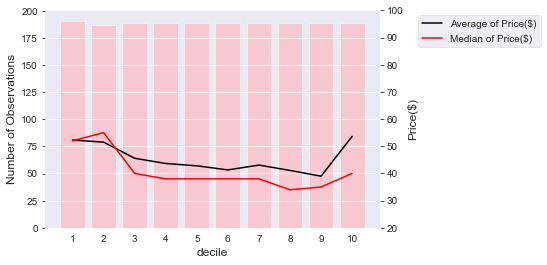

In [290]:
barchart_price(dataframe2, 'demand_supply_ratio', 'price', n = 10)

##### Insight from above anlaysis about demand_supply_ratio with price 

* Relationship is flat
* Lowest and Highest demand supply ratio have slightly higher booked price

Relation Between day_of_month with price Summary Table
   decile day_of_month_range  Number of Observations  Average of Price($)  \
0       1       (0.999, 4.0]                     226                44.01   
1       2         (4.0, 7.0]                     203                47.10   
2       3        (7.0, 10.0]                     183                44.90   
3       4       (10.0, 13.0]                     186                44.38   
4       5       (13.0, 16.0]                     186                47.17   
5       6       (16.0, 19.0]                     196                45.62   
6       7       (19.0, 22.0]                     192                42.31   
7       8       (22.0, 25.0]                     186                46.04   
8       9       (25.0, 28.0]                     185                46.00   
9      10       (28.0, 31.0]                     147                46.99   

   Median of Price($)  Percentage of Obsverations  
0                38.0                       1

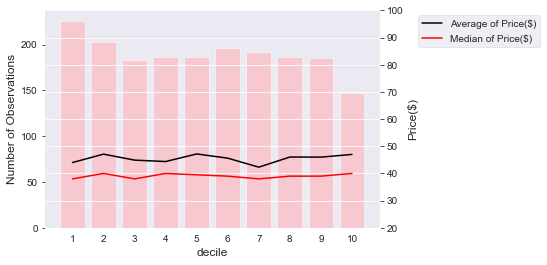

In [291]:
barchart_price(dataframe2, 'day_of_month', 'price', n = 10)

##### Insight from above anlaysis about day_of_month with price 

* Relationship is very flat

Relation Between day_of_week with price Summary Table
   decile  Number of Observations  Average of Price($)  Median of Price($)  \
0       1                     270                45.49                40.0   
1       2                     269                45.72                39.0   
2       3                     284                46.25                39.5   
3       4                     270                45.45                39.0   
4       5                     268                42.48                38.0   
5       6                     274                46.05                39.5   
6       7                     255                46.31                40.0   

   Percentage of Obsverations  
0                       14.29  
1                       14.23  
2                       15.03  
3                       14.29  
4                       14.18  
5                       14.50  
6                       13.49  

Relation Between day_of_week with price Summary Chart


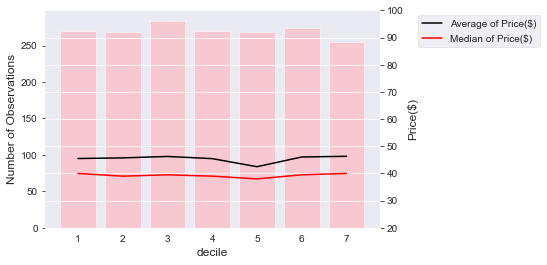

In [292]:
barchart_price(dataframe2, 'day_of_week', 'price', n = 10)

##### Insight from above anlaysis about day_of_week with price 

* Relationship is very flat

Relation Between weekend with price Summary Table
   decile  Number of Observations  Average of Price($)  Median of Price($)  \
0       0                    1361                45.09                  39   
1       1                     529                46.18                  40   

   Percentage of Obsverations  
0                       72.01  
1                       27.99  

Relation Between weekend with price Summary Chart


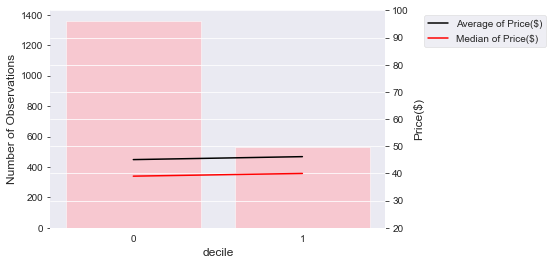

In [297]:
barchart_price(dataframe2, 'weekend', 'price', n = 10)

##### Insight from above anlaysis about weekend with price 

* Relationship is very flat

Relation Between holiday with price Summary Table
   decile  Number of Observations  Average of Price($)  Median of Price($)  \
0       0                    1825                45.33                  39   
1       1                      65                47.18                  39   

   Percentage of Obsverations  
0                       96.56  
1                        3.44  

Relation Between holiday with price Summary Chart


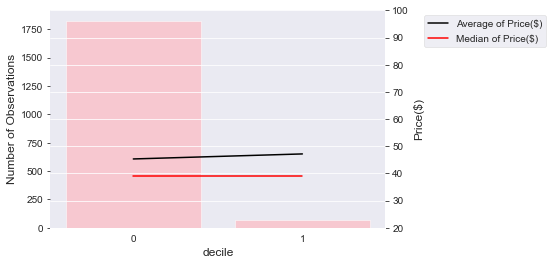

In [294]:
barchart_price(dataframe2, 'holiday', 'price', n = 10)

##### Insight from above anlaysis about holiday with price 

* Relationship is very flat
* holiday has a slightly higher booked price of non-holiday

In [313]:
def barchart_yearmonth_price(data, feat, target):
    df = data.copy()
    vis = df.groupby([feat])[target].agg(['count', 'mean', 'median']).reset_index().rename(columns = {'count': 'Number of Observations', 'mean':'Average of Price($)', 'median': 'Median of Price($)'})
    vis['Percentage of Obsverations'] = round((vis['Number of Observations'] / vis['Number of Observations'].sum()) * 100, 2)
    vis['Average of Price($)'] = round(vis['Average of Price($)'], 2)
    vis['Median of Price($)'] = round(vis['Median of Price($)'], 2)  
    vis.rename(columns = {feat: 'decile'}, inplace = True)
    print('Relation Between ' + feat + ' with ' + target + ' Summary Table')
    print(vis)
    print("\n========================================================")
    print('Relation Between ' + feat + ' with ' + target + ' Summary Chart')
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x='decile', y='Number of Observations', data=vis, color="Pink")
    vis['Average of Price($)'].plot(kind='line', color = 'k', secondary_y=True)
    vis['Median of Price($)'].plot(kind='line', color = 'r', secondary_y=True)
    plt.ylabel('Price($)')
    plt.ylim((20, 100))
    plt.legend(bbox_to_anchor=(1.10,1), loc="upper left")
    sns.despine(left=True)

Relation Between year_month with price Summary Table
     decile  Number of Observations  Average of Price($)  Median of Price($)  \
0   2018-02                      76                36.53                  37   
1   2018-03                      82                37.22                  38   
2   2018-04                     103                41.25                  39   
3   2018-05                     128                42.23                  39   
4   2018-06                     138                43.70                  39   
5   2018-07                     137                47.66                  40   
6   2018-08                     171                51.30                  40   
7   2018-09                     180                46.48                  37   
8   2018-10                     202                47.31                  40   
9   2018-11                     176                49.04                  40   
10  2018-12                     166                47.22           

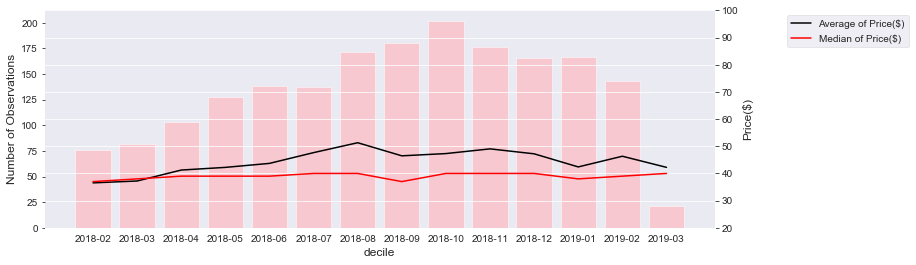

In [314]:
barchart_yearmonth_price(dataframe2, 'year_month', 'price')

##### Insight from above anlaysis about year_month with price 

* Relationship is very flat

### Correlation check among all variables

In [298]:
col = ['is_booked', 'tmv', 'demand_supply_ratio', 'price', 'day_of_month',
       'day_of_week', 'weekend', 'holiday', 'category_grouped_num']

In [301]:
correlation_result = CI.chk_corr(dataframe2, col, threshold = 0)

In [304]:
correlation_result.sort_values(by = 'Correlation')

,Var1,Var2,Correlation
31,day_of_week,holiday,-0.232918
20,demand_supply_ratio,category_grouped_num,-0.231439
2,is_booked,price,-0.122067
33,weekend,holiday,-0.117659
7,is_booked,category_grouped_num,-0.0988585
15,demand_supply_ratio,price,-0.047594
28,day_of_month,holiday,-0.0348221
11,tmv,day_of_week,-0.0251662
0,is_booked,tmv,-0.0200763
8,tmv,demand_supply_ratio,-0.0134034


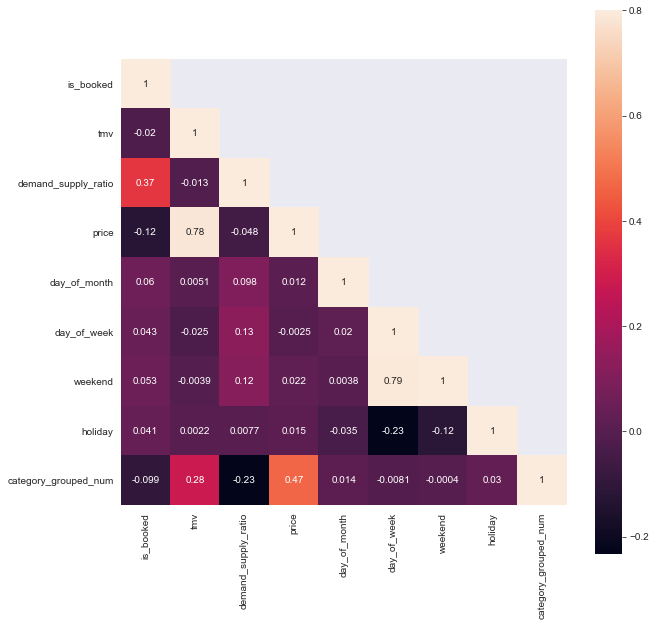

In [312]:
plt.figure(figsize=(10,10))
mask = np.array(dataframe2[col].corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(dataframe2[col].corr(), mask=mask,
           vmax=.8, square=True,annot=True)

* Correlation between price and tmv is very high (as expected)
* demand_supply_ratio with is_booked has high positive correlationship 
* Overall correlational statistics are not very high.

### Create Historical Performance Variables

Since we have 25 distinct vehicles with total 1,890 records from 2018-02 to 2019-03, we can create following variables based on historical performance

* booked_rate_past28days  - 4 weeks
* days_past_since_last_booked
* most_recent_booked_price
* most_recent_nobooked_price
* average_list_price_past28days  - 4 weeks

In [374]:
def cal_hist_perf1(data):
    df = data.copy(deep=True)
    df1 = df.merge(df[df['is_booked'] == 1], on = 'vehicle_id', how = 'left').query('date_x > date_y')
    df2 = df1.loc[df1.groupby(['vehicle_id', 'date_x'])['date_y'].idxmax(), :]
    df3 = df.merge(df2, how = 'left', left_on = ['vehicle_id', 'date'], right_on = ['vehicle_id', 'date_x'])[['vehicle_id', 'date', 'is_booked', 'tmv', 'category_grouped',
   'demand_supply_ratio', 'price', 'year_month', 'day_of_month',
   'day_of_week', 'weekend', 'holiday', 'category_grouped_num', 'date_y', 'price_y']].rename(columns={'date_y':'most_recent_booked_date', 'price_y': 'most_recent_booked_price'})
    df4 = df3.merge(df3[df3['is_booked'] == 0], on = 'vehicle_id', how = 'left').query('date_x > date_y')
    df5 = df4.loc[df4.groupby(['vehicle_id', 'date_x'])['date_y'].idxmax(), :]
    df6 = df3.merge(df5, how = 'left', left_on = ['vehicle_id', 'date'], right_on = ['vehicle_id', 'date_x'])[['vehicle_id', 'date', 'is_booked', 'tmv', 'category_grouped',
   'demand_supply_ratio', 'price', 'year_month', 'day_of_month',
   'day_of_week', 'weekend', 'holiday', 'category_grouped_num','most_recent_booked_date', 'most_recent_booked_price','date_y', 'price_y']].rename(columns={'date_y':'most_recent_nobooked_date', 'price_y': 'most_recent_nobooked_price'})
    return df6  

In [377]:
dataframe2.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1


In [375]:
dataframe3 = cal_hist_perf1(dataframe2)

In [378]:
dataframe3.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num,most_recent_booked_date,most_recent_booked_price,most_recent_nobooked_date,most_recent_nobooked_price
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1,2018-03-03,24.0,2018-05-20,30.0
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0,2018-05-06,41.0,2018-05-09,37.0
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1,2018-04-02,24.0,2018-02-27,24.0
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2,2018-12-29,121.0,2018-12-20,85.0
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1,NaT,NaN,2018-08-06,42.0


In [386]:
# calculate the days_past_since_last_booked
dataframe3['days_past_since_last_booked'] = (dataframe3['date'] - dataframe3['most_recent_booked_date']).dt.days

In [388]:
dataframe3.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num,most_recent_booked_date,most_recent_booked_price,most_recent_nobooked_date,most_recent_nobooked_price,days_past_since_last_booked
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1,2018-03-03,24.0,2018-05-20,30.0,83.0
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0,2018-05-06,41.0,2018-05-09,37.0,6.0
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1,2018-04-02,24.0,2018-02-27,24.0,5.0
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2,2018-12-29,121.0,2018-12-20,85.0,2.0
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1,NaT,NaN,2018-08-06,42.0,NaN


In [469]:
dataframe3.columns

Index(['vehicle_id', 'date', 'is_booked', 'tmv', 'category_grouped',
       'demand_supply_ratio', 'price', 'year_month', 'day_of_month',
       'day_of_week', 'weekend', 'holiday', 'category_grouped_num',
       'most_recent_booked_date', 'most_recent_booked_price',
       'most_recent_nobooked_date', 'most_recent_nobooked_price',
       'days_past_since_last_booked'],
      dtype='object')

In [479]:
def cal_past28days_booked_rate(data):
    df = data.copy()
    df['start_date'] = df['date'] - timedelta(days=28)
    df1 = df[['vehicle_id', 'date', 'is_booked', 'price']]
    df2 = df.merge(df1, on = 'vehicle_id', how = 'left').query('date_y < date_x and date_y >= start_date')
    df3 = df2.groupby(['vehicle_id', 'date_x'])['is_booked_y'].agg(['count', 'sum']).reset_index()
    df3['booked_rate_past28days'] = (df3['sum'] / df3['count'])
    df4 = df.merge(df3, left_on = ['vehicle_id', 'date'], right_on = ['vehicle_id', 'date_x'], how = 'left')[['vehicle_id', 'date', 'is_booked', 'tmv', 'category_grouped',
       'demand_supply_ratio', 'price', 'year_month', 'day_of_month',
       'day_of_week', 'weekend', 'holiday', 'category_grouped_num',
       'most_recent_booked_date', 'most_recent_booked_price',
       'most_recent_nobooked_date', 'most_recent_nobooked_price',
       'days_past_since_last_booked', 'booked_rate_past28days']]
    return df4

In [488]:
dataframe4 = cal_past28days_booked_rate(dataframe3)

In [489]:
dataframe4.shape

(1890, 19)

In [490]:
dataframe4.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num,most_recent_booked_date,most_recent_booked_price,most_recent_nobooked_date,most_recent_nobooked_price,days_past_since_last_booked,booked_rate_past28days
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1,2018-03-03,24.0,2018-05-20,30.0,83.0,0.000000
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0,2018-05-06,41.0,2018-05-09,37.0,6.0,0.666667
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1,2018-04-02,24.0,2018-02-27,24.0,5.0,1.000000
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2,2018-12-29,121.0,2018-12-20,85.0,2.0,0.500000
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1,NaT,NaN,2018-08-06,42.0,NaN,0.000000


In [496]:
def cal_past28days_price(data):
    df = data.copy()
    df['start_date'] = df['date'] - timedelta(days=28)
    df1 = df[['vehicle_id', 'date', 'is_booked', 'price']]
    df2 = df.merge(df1, on = 'vehicle_id', how = 'left').query('date_y < date_x and date_y >= start_date')
    df3 = df2.groupby(['vehicle_id', 'date_x'])['price_y'].mean().to_frame('average_list_price_past28days').reset_index()
    df4 = df.merge(df3, left_on = ['vehicle_id', 'date'], right_on = ['vehicle_id', 'date_x'], how = 'left')[['vehicle_id', 'date', 'is_booked', 'tmv', 'category_grouped',
       'demand_supply_ratio', 'price', 'year_month', 'day_of_month',
       'day_of_week', 'weekend', 'holiday', 'category_grouped_num',
       'most_recent_booked_date', 'most_recent_booked_price',
       'most_recent_nobooked_date', 'most_recent_nobooked_price',
       'days_past_since_last_booked', 'booked_rate_past28days', 'average_list_price_past28days']]
    return df4

In [498]:
dataframe5 = cal_past28days_price(dataframe4)

In [501]:
dataframe5.shape

(1890, 20)

In [502]:
dataframe5.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num,most_recent_booked_date,most_recent_booked_price,most_recent_nobooked_date,most_recent_nobooked_price,days_past_since_last_booked,booked_rate_past28days,average_list_price_past28days
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1,2018-03-03,24.0,2018-05-20,30.0,83.0,0.000000,30.000000
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0,2018-05-06,41.0,2018-05-09,37.0,6.0,0.666667,38.444444
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1,2018-04-02,24.0,2018-02-27,24.0,5.0,1.000000,24.000000
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2,2018-12-29,121.0,2018-12-20,85.0,2.0,0.500000,99.375000
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1,NaT,NaN,2018-08-06,42.0,NaN,0.000000,42.000000


In [505]:
CI.describe_table(dataframe5)

,Variable Name,Variable Type,Unique Values,Percentage of Missing Value
0,most_recent_nobooked_price,float64,72,10.05%
1,most_recent_nobooked_date,datetime64[ns],341,10.05%
2,days_past_since_last_booked,float64,190,9.05%
3,most_recent_booked_price,float64,65,9.05%
4,most_recent_booked_date,datetime64[ns],366,9.05%
5,average_list_price_past28days,float64,736,1.53%
6,booked_rate_past28days,float64,64,1.53%
7,weekend,int64,2,0.00%
8,category_grouped_num,int8,5,0.00%
9,holiday,int64,2,0.00%


##### Fill the missing value
* booked_rate_past28days - 4 weeks --- Use 0 replace the missing
* days_past_since_last_booked  --- leave missing as missing
* most_recent_booked_price --- Use 0 replace the missing
* most_recent_nobooked_price  --- Use 0 replace the missing
* average_list_price_past28days - 4 weeks  --- Use 0 repalce the missing

In [509]:
def fill_missing(data, col_list):
    df = data.copy()
    for col in col_list:
        df[col] = df[col].fillna(0)
    return df

In [511]:
col_list = ['booked_rate_past28days', 'most_recent_booked_price', 'most_recent_nobooked_price', 'average_list_price_past28days']
dataframe6 = fill_missing(dataframe5, col_list)

In [513]:
CI.describe_table(dataframe6)

,Variable Name,Variable Type,Unique Values,Percentage of Missing Value
0,most_recent_nobooked_date,datetime64[ns],341,10.05%
1,days_past_since_last_booked,float64,190,9.05%
2,most_recent_booked_date,datetime64[ns],366,9.05%
3,index,int64,1890,0.00%
4,weekend,int64,2,0.00%
5,booked_rate_past28days,float64,64,0.00%
6,most_recent_nobooked_price,float64,73,0.00%
7,most_recent_booked_price,float64,66,0.00%
8,category_grouped_num,int8,5,0.00%
9,holiday,int64,2,0.00%


### Check relationship between derivated variable with is_booked

In [522]:
dataframe6.head()

,vehicle_id,date,is_booked,tmv,category_grouped,demand_supply_ratio,price,year_month,day_of_month,day_of_week,weekend,holiday,category_grouped_num,most_recent_booked_date,most_recent_booked_price,most_recent_nobooked_date,most_recent_nobooked_price,days_past_since_last_booked,booked_rate_past28days,average_list_price_past28days
0,333483,2018-05-25,0,14569,midsize,1.902318,30,2018-05,25,5,0,0,1,2018-03-03,24.0,2018-05-20,30.0,83.0,0.000000,30.000000
1,304273,2018-05-12,1,4201,compact,14.622831,39,2018-05,12,6,1,0,0,2018-05-06,41.0,2018-05-09,37.0,6.0,0.666667,38.444444
2,298081,2018-04-07,1,5724,midsize,8.659708,24,2018-04,7,6,1,0,1,2018-04-02,24.0,2018-02-27,24.0,5.0,1.000000,24.000000
3,406331,2018-12-31,1,39102,suv,13.570390,121,2018-12,31,1,0,0,2,2018-12-29,121.0,2018-12-20,85.0,2.0,0.500000,99.375000
4,456223,2018-08-09,0,9666,midsize,1.297453,42,2018-08,9,4,0,0,1,NaT,0.0,2018-08-06,42.0,NaN,0.000000,42.000000


Relation Between most_recent_booked_price with is_booked Summary Table
   decile most_recent_booked_price_range  Number of Observations  \
0       1                 (-0.001, 20.0]                     192   
1       2                   (20.0, 25.0]                     253   
2       3                   (25.0, 29.0]                     180   
3       4                   (29.0, 31.0]                     155   
4       5                   (31.0, 36.0]                     170   
5       6                   (36.0, 39.0]                     215   
6       7                   (39.0, 40.0]                     167   
7       8                   (40.0, 55.0]                     211   
8       9                   (55.0, 78.0]                     176   
9      10                  (78.0, 134.0]                     171   

   Number of Booked  Percentage of Obsverations  Booked Rate(%)  
0                41                       10.16           21.35  
1               106                       13.39 

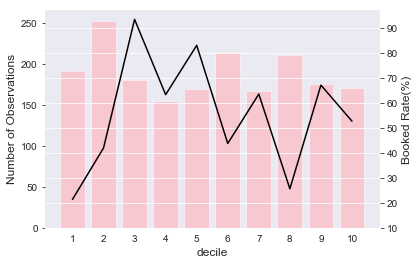

In [518]:
barchart(dataframe6, 'most_recent_booked_price', 'is_booked', n = 10)

Relation Between average_list_price_past28days with is_booked Summary Table
   decile average_list_price_past28days_range  Number of Observations  \
0       1                    (-0.001, 25.662]                     189   
1       2                      (25.662, 29.0]                     226   
2       3                        (29.0, 31.6]                     153   
3       4                        (31.6, 34.0]                     199   
4       5                        (34.0, 39.0]                     228   
5       6                        (39.0, 40.0]                     184   
6       7                      (40.0, 45.038]                     144   
7       8                     (45.038, 57.21]                     189   
8       9                      (57.21, 82.25]                     190   
9      10                    (82.25, 119.333]                     188   

   Number of Booked  Percentage of Obsverations  Booked Rate(%)  
0               125                       10.00       

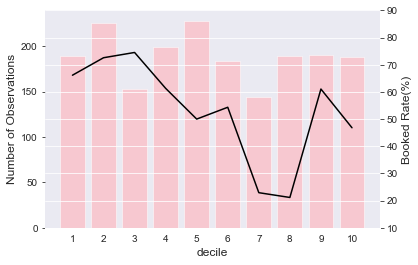

In [520]:
barchart(dataframe6, 'average_list_price_past28days', 'is_booked', n = 10)

In [526]:
dataframe6.dtypes

vehicle_id                                int64
date                             datetime64[ns]
is_booked                                 int64
tmv                                       int64
category_grouped                       category
demand_supply_ratio                     float64
price                                     int64
year_month                               object
day_of_month                              int64
day_of_week                               int64
weekend                                   int64
holiday                                   int64
category_grouped_num                       int8
most_recent_booked_date          datetime64[ns]
most_recent_booked_price                float64
most_recent_nobooked_date        datetime64[ns]
most_recent_nobooked_price              float64
days_past_since_last_booked             float64
booked_rate_past28days                  float64
average_list_price_past28days           float64
dtype: object

In [527]:
dataframe6[['most_recent_booked_price', 'most_recent_nobooked_price', 'days_past_since_last_booked', 'booked_rate_past28days', 
       'average_list_price_past28days']].describe()

,most_recent_booked_price,most_recent_nobooked_price,days_past_since_last_booked,booked_rate_past28days,average_list_price_past28days
count,1890.000000,1890.000000,1719.00000,1890.000000,1890.000000
mean,40.082011,40.967725,24.55032,0.529353,44.659368
std,25.082799,25.474855,52.99813,0.394737,22.352313
min,0.000000,0.000000,1.00000,0.000000,0.000000
25%,26.000000,27.000000,2.00000,0.000000,30.000000
50%,36.000000,38.000000,5.00000,0.600000,39.000000
75%,42.750000,50.000000,16.00000,0.900000,52.000000
max,134.000000,125.000000,362.00000,1.000000,119.333333


### Check the correlation

In [528]:
col = ['is_booked', 'tmv', 'demand_supply_ratio', 'price', 'day_of_month',
       'day_of_week', 'weekend', 'holiday', 'category_grouped_num', 'most_recent_booked_price', 'most_recent_nobooked_price', 'days_past_since_last_booked', 'booked_rate_past28days', 
       'average_list_price_past28days']

In [529]:
correlation_result = CI.chk_corr(dataframe6, col, threshold = 0)

In [530]:
correlation_result.sort_values(by = 'Correlation')

,Var1,Var2,Correlation
88,days_past_since_last_booked,booked_rate_past28days,-0.576906
10,is_booked,days_past_since_last_booked,-0.426408
33,demand_supply_ratio,days_past_since_last_booked,-0.357171
86,most_recent_nobooked_price,booked_rate_past28days,-0.281045
56,day_of_week,holiday,-0.232918
30,demand_supply_ratio,category_grouped_num,-0.231439
9,is_booked,most_recent_nobooked_price,-0.218723
44,price,booked_rate_past28days,-0.152196
32,demand_supply_ratio,most_recent_nobooked_price,-0.131784
2,is_booked,price,-0.122067


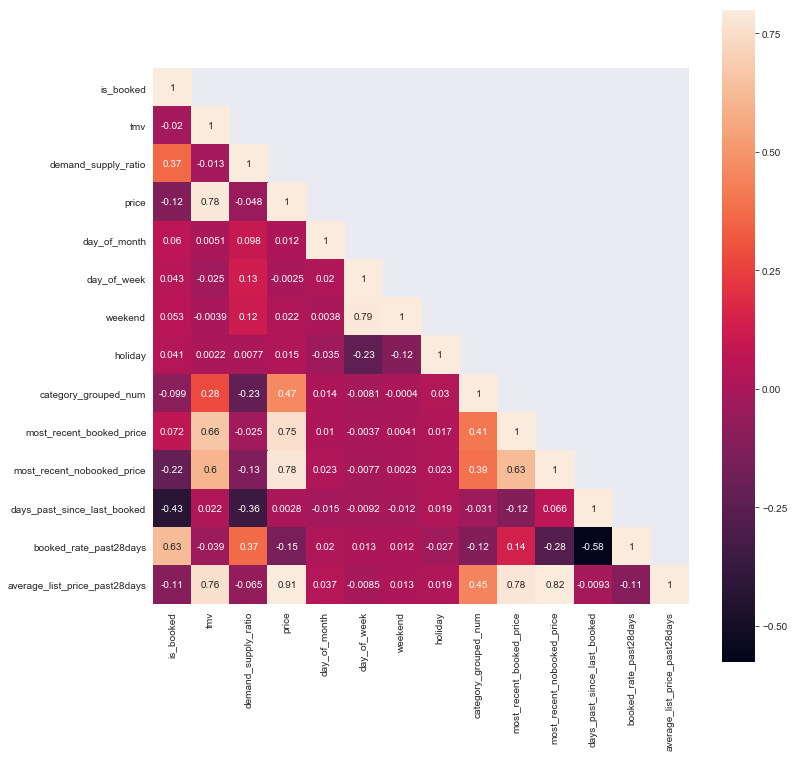

In [532]:
plt.figure(figsize=(12,12))
mask = np.array(dataframe6[col].corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(dataframe6[col].corr(), mask=mask,
           vmax=.8, square=True,annot=True)

* Correlation between price and tmv is very high (as expected)
* demand_supply_ratio with is_booked has high positive correlationship 
* Overall correlational statistics are not very high.

**Moreover**
* most_recent_booked_price has higher correlation with tmv
* most_recent_nobooked_price has higher correlation with tmv
* days_past_since_last_booked has higher negative correlation with is_booked
* days_past_since_last_booked has higher negative correlation with demand_supply_ratio
* booked_rate_past28days has higher positive correlation with is_booked and negative correlation with days_past_since_last_booked
* average_list_price_past28days has higher positive correlation with tmv

#### Save the data to csv for modeling

In [533]:
dataframe6.to_csv('dataframe_price_eda.csv', index=False)

## Next Step

* Build two stage models:
    * Booking probability model: estimate probability of vehicles being booked
    * Use predicted booking probability as input to build Pricing strategy model
* Measuring business impact
    * Price Decrease Recall (PDR): among all non-booked date, the percentage of predict / suggest price that are lower than ground truth / list price
    * Price Decrease Precision (PDP): among all cases where Psug < P (suggest price < list price), the percentage of days and vehicle that are non-booked
    * Price Increase Recall (PIR): among all booked days, the percentage of suggest price that are higher than or equal to list prices
    * Price Increase Precision (PIP): among all cases where Psug >= P (suggest price >= list price), the percentage of days that are booked
    * Booking Regret (BR): $$BR = average_{bookings}(max(0, (P - P_{suggest}) / P)$$